# Posets and Lattices

## Math 737 - Lab 2

## Sage includes many pre-defined posets. Let's explore these. Type posets with a . after it. Then press tab. You should see a list of built-in posets.


## Exercise 1: Plot several built-in posets. You may need to insert a parameter such as 3 inside the parentheses at the end.

In [8]:
B = posets.BubblePoset(3,2)
H = posets.HochschildLattice(5)
S = posets.SymmetricGroupWeakOrderPoset(4)

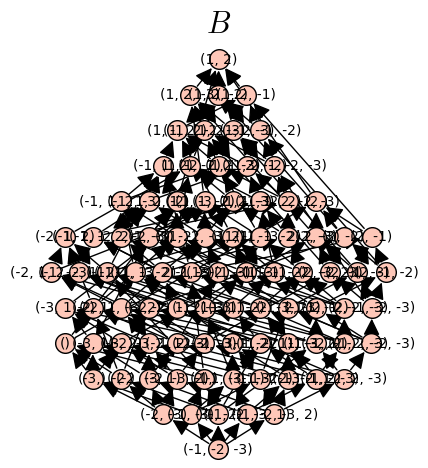

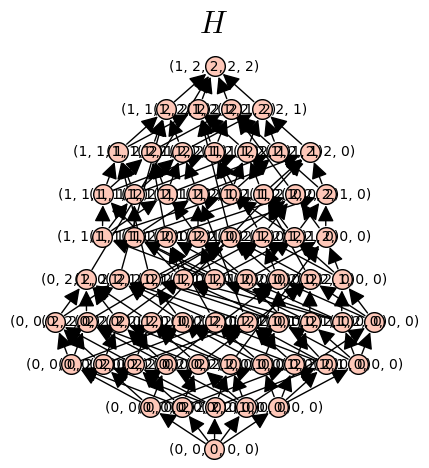

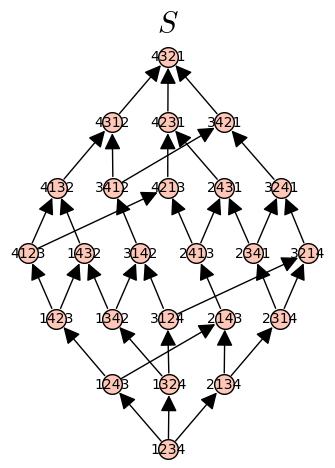

In [27]:
g1 = B.plot(
    axes=False,
)

g2 = H.plot(
    axes=False,
)

g3 = S.plot(
    axes=False,
)


h = B.height() # This is a constant to scale things
g1.set_axes_range(-h, h, -1, h + 0.5) # makes some axes

(g1 + text(r"$B$", (5.5, 12),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g2 + text(r"$H$", (4.5, 10),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g3 + text(r"$S$", (3, 6.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()

## Sage includes many common combinatorial objects. Let's use Sage to make natural posets on combinatorial objects.

### Until now, we have defined posets by inputting elements and covering relations. Now let's define a poset by specifying a set of combinatorial objects and the partial order as a function which returns 'True' if x < y and 'False' otherwise.


## Exercise 2: Evaluate the blocks and follow the directions below to define the poset on Dyck paths for $n=3,4,5$ with partial order of containment.

In [32]:
DW ={
    "3": DyckWords(3),
    "4": DyckWords(4),
    "5": DyckWords(5)
}

()()()


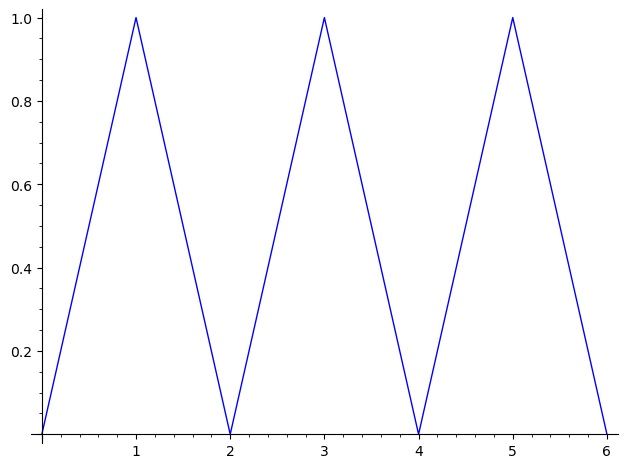

------------------------------------------------------------------------------------------
()(())


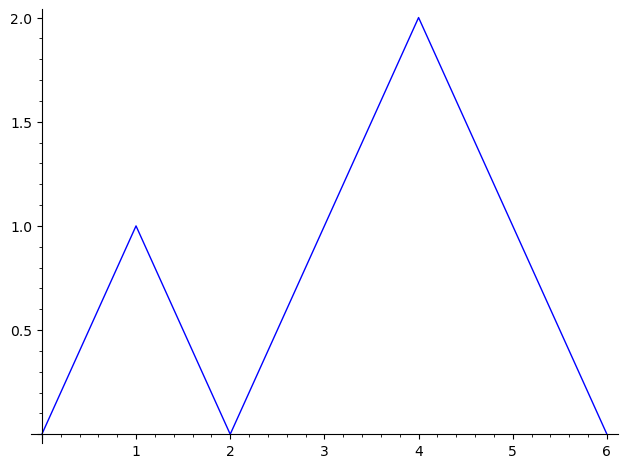

------------------------------------------------------------------------------------------
(())()


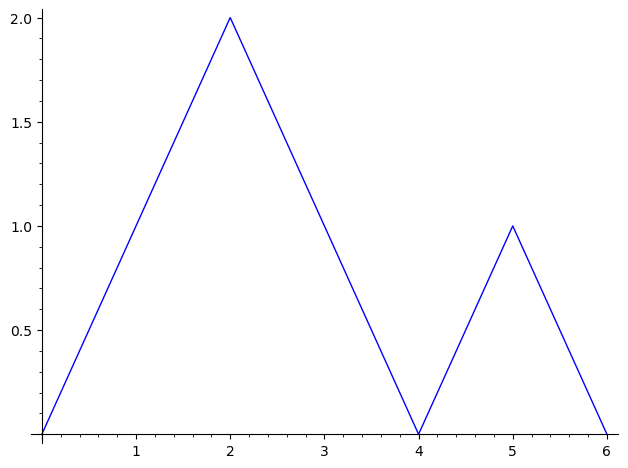

------------------------------------------------------------------------------------------
(()())


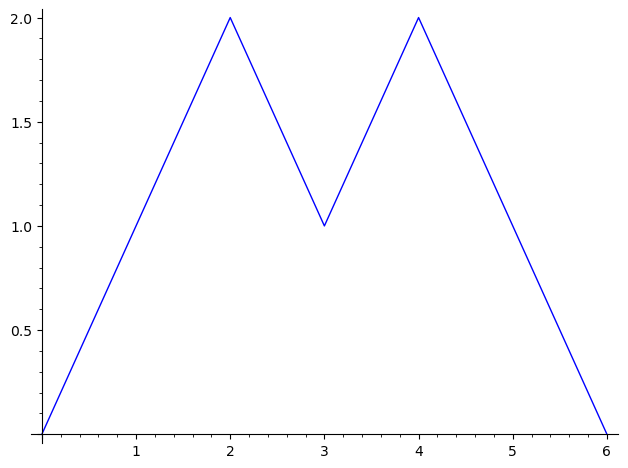

------------------------------------------------------------------------------------------
((()))


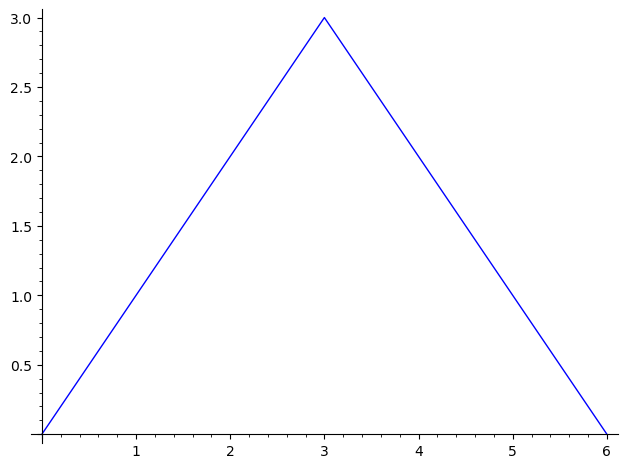

------------------------------------------------------------------------------------------


In [36]:
#for key,D in DW.items():
    #print(f"Dyck words with {key} pairs of parantheses:")
for d in DW["3"]:
    print(d)
    (d.plot()).show()
    d.to_partition()
    print("------------------------------------------------------------------------------------------")

### Below we define a function for the partial order by diagram containment. 
#### Note how functions are structured in Python. 

#### A function starts with 'def' and then has the name of the function followed by the inputs inside ( ) and a colon : at the end of the first line. 

#### Then the next lines are indented and contain commands for the function to do. The last line includes 'return' to indicate what the function returns.

In [37]:
def dyck_path_containment(x,y):
    xpartition = x.to_partition()
    ypartition = y.to_partition()
    return xpartition.contains(ypartition)

### Evaluate the block below to see the Dyck path poset for n=3.

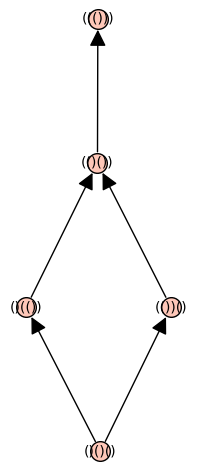

In [38]:
dyck_path_poset = Poset((DyckWords(3),dyck_path_containment))
dyck_path_poset.plot()

### Copy the above commands to plot the Dyck path posets for n=4 and n=5. Give each poset a new name.

Dyck path poset with 3 pairs of parantheses:


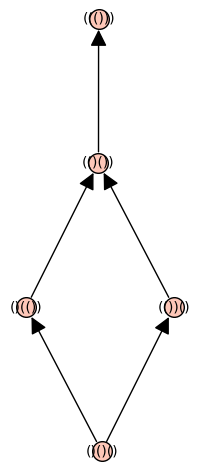

Dyck path poset with 4 pairs of parantheses:


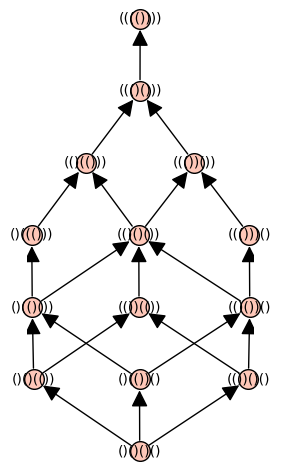

Dyck path poset with 5 pairs of parantheses:


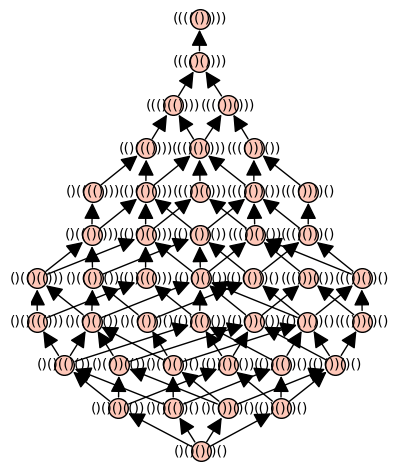

{'3': Finite poset containing 5 elements, '4': Finite poset containing 14 elements, '5': Finite poset containing 42 elements}


In [57]:
DW ={
    "3": DyckWords(3),
    "4": DyckWords(4),
    "5": DyckWords(5)
}

DW_P = {}
for key,D in DW.items():
    DW_P[key]= Poset((DW[key],dyck_path_containment))
    print(f"Dyck path poset with {key} pairs of parantheses:")
    DW_P[key].plot().show()
print(DW_P)



## Exercise 3: Evaluate the blocks and follow the directions below to explore lattice properties of the Dyck path poset.

### We can ask Sage if the Dyck path poset is a lattice

In [43]:
dyck_path_poset.is_lattice()

True

### Sage has a different class for lattices. We can change our poset to that class and then ask whether it is distributive.

In [45]:
#type something
dyck_path_lattice = LatticePoset(dyck_path_poset)
dyck_path_poset.is_lattice()

True

### Put your cursor in the block below and press tab to find a function to help you tell if this lattice is distributive. Use this function.

In [46]:
dyck_path_lattice.is_distributive()

True

### Now use the command 'join_irreducibles_poset' on dyck_path_lattice. Plot the resulting poset and compare to what we discussed at the end of class yesterday.

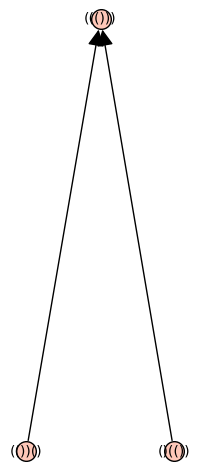

In [53]:
DW_P_JI = dyck_path_lattice.join_irreducibles_poset()
DW_P_JI.plot().show()


### Do the above sequence of commands for $n=4$ and $n=5$ to plot the posets of join irreducibles in those cases. What do you conclude?

Join Irreducible Dyck path poset with 3 pairs of parantheses:


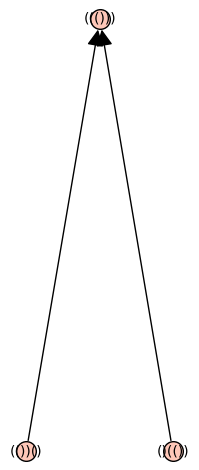

Join Irreducible Dyck path poset with 4 pairs of parantheses:


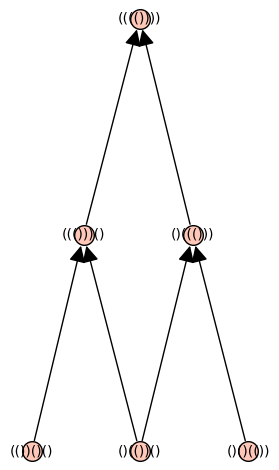

Join Irreducible Dyck path poset with 5 pairs of parantheses:


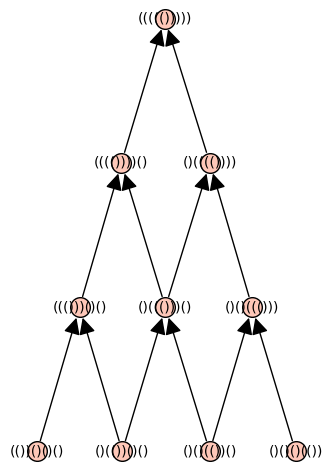

{'3': Finite poset containing 5 elements, '4': Finite poset containing 14 elements, '5': Finite poset containing 42 elements}


In [58]:
DW ={
    "3": DyckWords(3),
    "4": DyckWords(4),
    "5": DyckWords(5)
}

DW_LP = {}
for key,D in DW_P.items():
    DW_LP[key]= LatticePoset(DW_P[key]).join_irreducibles_poset()
    print(f"Join Irreducible Dyck path poset with {key} pairs of parantheses:")
    DW_LP[key].plot().show()
print(DW_P)


## Exercise 4: Explore functions on Permutations (by typing . and tab after the function in the block below) to find and plot the strong and weak Bruhat order for $n=3,4,5$. Then check whether they are lattices, and if so, whether they are distributive.
### Hint: these posets are built-in, so you do not need to define the partial order function yourself.

n=3:
Bruhat weak order poset for permutations on [3]:


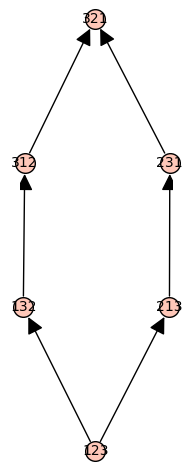

Bruhat strong order poset for permutations on [3]:


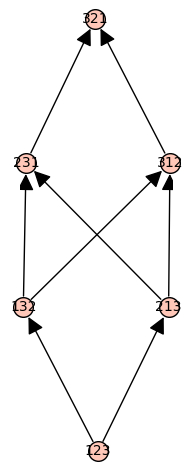

n=4:
Bruhat weak order poset for permutations on [4]:


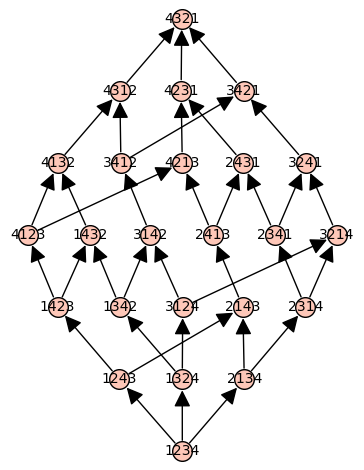

Bruhat strong order poset for permutations on [4]:


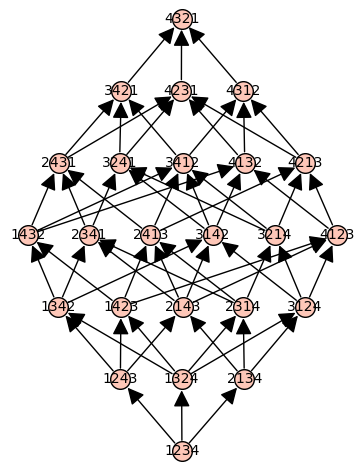

n=5:
Bruhat weak order poset for permutations on [5]:


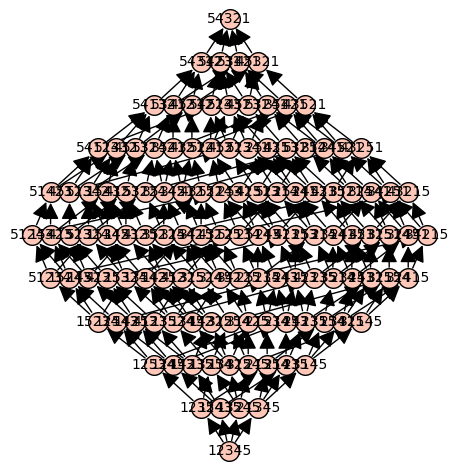

Bruhat strong order poset for permutations on [5]:


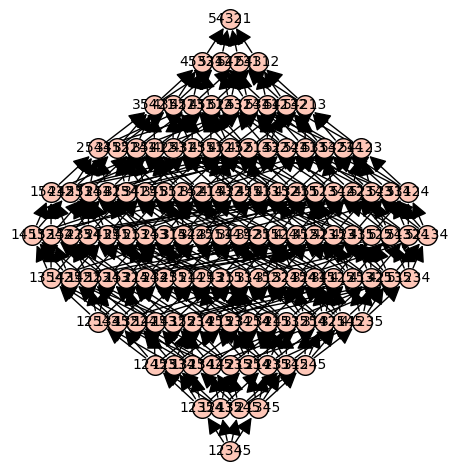

In [78]:
for n in [3,4,5]:     # as the worksheet says
    print(f"n={n}:")
    print(f"Bruhat weak order poset for permutations on [{n}]:")
    W = posets.SymmetricGroupWeakOrderPoset(n) # Bruhat weak order poset on permutations on [n]
    W.plot().show()   # strong Bruhat order on S_n
    print(f"Bruhat strong order poset for permutations on [{n}]:")
    B = posets.SymmetricGroupBruhatOrderPoset(n) #Bruhat strong order poset for permutations on [n]
    B.plot().show()   # strong Bruhat order on S_n





## Exercise 5: Do some more exploration with posets in Sage. Write a sentence or two about what you discover.

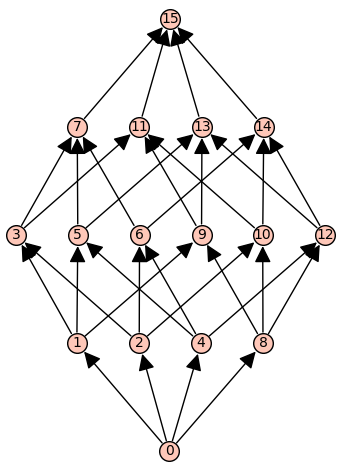

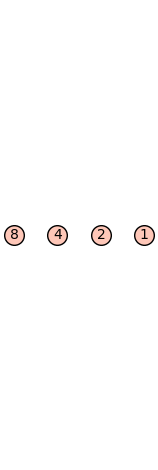

B size 16 JI size 4


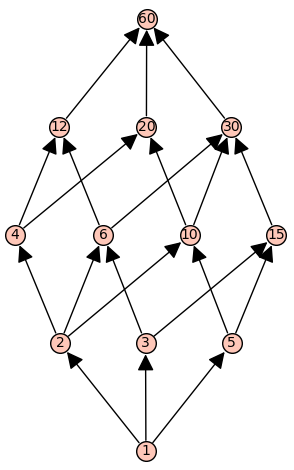

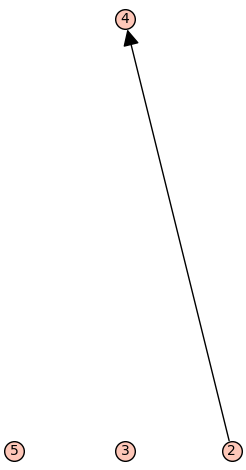

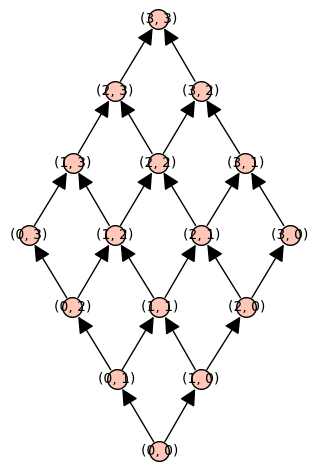

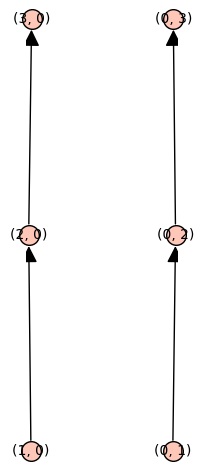

In [99]:
n = 4
B = posets.BooleanLattice(n)
B.plot().show()

JI = B.join_irreducibles_poset()
JI.plot().show()
print("B size", B.cardinality(), "JI size", JI.cardinality())

m = 60
D = posets.DivisorLattice(m)
D.plot().show()

D.join_irreducibles_poset().plot().show()

C = posets.ChainPoset(4)
G = C.product(C)   # 4x4 grid lattice
G.plot().show()
G.join_irreducibles_poset().plot().show()



There are a lot of useful built in posets and methods in sage. I could see this being useful for all kinds of things. Pretty cool. 